In [6]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt


In [1]:

input_tif = 'output/multi_band_output.tif'

with rasterio.open(
    input_tif, mode="r", nodata=0) as src:
    # read in the array, band 3 first, then band 2, then band 1
    arr = src.read([3, 2, 1])
    # the array has three bands
    print("Array shape:", arr.shape)
    # look at the profile, despite setting nodata=0, there still isn't a nodata value 
    # this is because we need to update the profile and write out a new image with
    #  nodata set
    profile = src.profile
    red = src.read(1)  # Red band (usually the first band)
    nir = src.read(4)  # NIR band (e.g., 4th band, depending on your dataset)

    print(red.shape, nir.shape)
    print(profile)
    print(profile["crs"])
    print("nor --> ", nir)

# Save first raster
with rasterio.open(
        "output/naic_band_red.tif",
        mode="w",
        driver="GTiff",
        height=red.shape[0],
        width=red.shape[1],
        count=1,
        dtype=red.dtype,
        crs=profile["crs"],
        transform=profile["transform"],
) as new_dataset:
        new_dataset.write(red, 1)

# Save second raster
with rasterio.open(
        "output/naic_band_nir.tif",
        mode="w",
        driver="GTiff",
        height=nir.shape[0],
        width=nir.shape[1],
        count=1,
        dtype=nir.dtype,
        crs=profile["crs"],
        transform=profile["transform"],
) as new_dataset:
        new_dataset.write(nir, 1)

Array shape: (3, 7801, 7651)
(7801, 7651) (7801, 7651)
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 7651, 'height': 7801, 'count': 4, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 17N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-81],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32617"]]'), 'transform': Affine(30.0, 0.0, 364485.0,
       0.0, -30.0, 3310215.0), 'blockxsize': 7651, 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}
EPSG:32617
nor -->  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


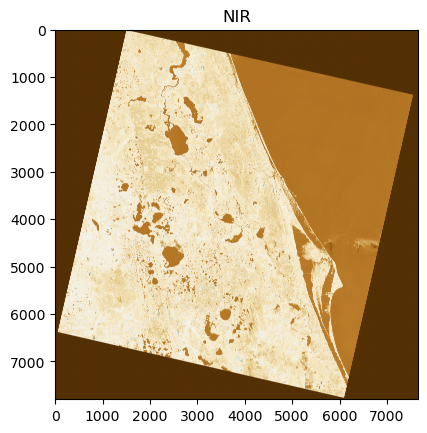

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(None, (7801, 7651))

In [2]:
# Open raster and plot
band_nir = rasterio.open("output/naic_band_nir.tif").read(1)
plt.imshow(band_nir, cmap = "BrBG")
plt.title("NIR")
plt.show()

# View raster values
print(band_nir), band_nir.shape

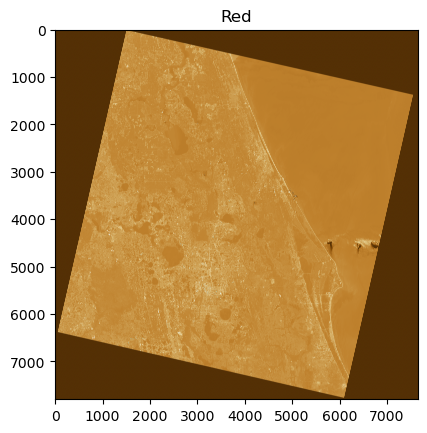

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(None, (7801, 7651))

In [3]:
band_red = rasterio.open("output/naic_band_red.tif").read(1)
plt.imshow(band_red, cmap = "BrBG")
plt.title("Red")
plt.show()

# View raster values
print(band_red), band_red.shape

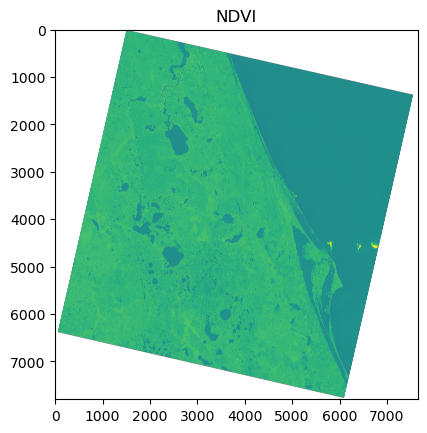

Raster values:
 [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [7]:

# Open raster (Landsat 8, Collection 2 Level-2)
# Band 1 - Blue, Band 2 - Green, Band 3 - Red, Band 4 - Near Infrared
# Source: https://www.usgs.gov/centers/eros/science/usgs-eros-archive-landsat-archives-landsat-8-9-olitirs-collection-2-level-2



# Allow division by zero
np.seterr(divide = "ignore", invalid = "ignore")

# Calculate NDVI
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)

# Set pixels whose values are outside the NDVI range (-1, 1) to NaN
# Likely due to errors in the Landsat imagery
ndvi[ndvi > 1] = np.nan
ndvi[ndvi < -1] = np.nan

# Plot raster
plt.imshow(ndvi)
plt.title("NDVI")
plt.show()

# Show raster values
print("Raster values:\n", ndvi)